Text Mining and Image Processing
Hoja de trabajo No2  
Luis Adolfo Martínez
Carné:
**22000352** 

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import os.path
from os import path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

In [5]:
def cargaImagen(img):
  salida = cv2.imread(img)
  salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)
  plt.imshow(salida)
  return salida

**Problema 1**

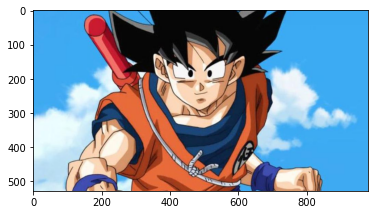

In [6]:
img = cargaImagen("goku.jpg")

## Problema 1

In [7]:
def fn_binarizacion(imagen):
  binary_convert = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
  
  resu, binary = cv2.threshold(binary_convert,0,255,cv2.THRESH_TRIANGLE)

  nombre = "Image_binay.jpg"
  cv2.imwrite(nombre, binary)
  img = cv2.imread(nombre)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

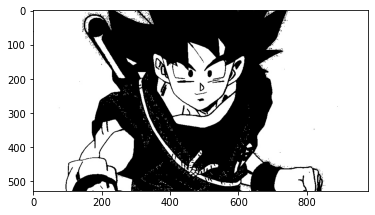

In [8]:
fn_binarizacion(img)

## Problema 2

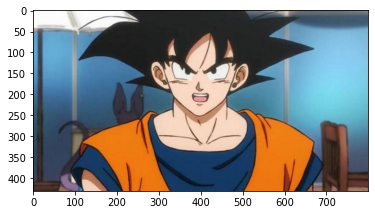

In [9]:
img1 = cargaImagen("goku1.jpg")

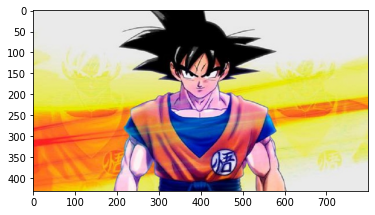

In [10]:
img2 = cargaImagen("goku2.jpg")

In [11]:
def sum_img(img1,img2):
  imgsuma = cv2.add(img1,img2)
  imgsuma = cv2.cvtColor(imgsuma, cv2.COLOR_BGR2RGB)
  return imgsuma

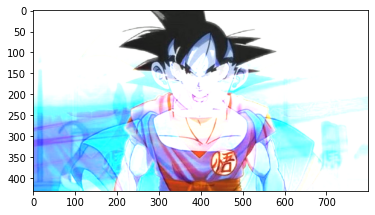

In [12]:
plt.imshow(sum_img(img1,img2))

**Resta**

In [13]:
def restaImage(img1,img2):
  imgresta = cv2.absdiff(img1,img2)
  imgresta = cv2.cvtColor(imgresta,cv2.COLOR_BGR2RGB)
  return imgresta

In [14]:
imgrsta = restaImage(img1,img2)


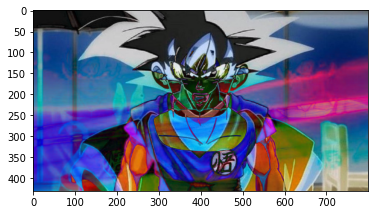

In [15]:
plt.imshow(imgrsta)

**And**

In [16]:
def imgand(img1,img2):
  imgand = cv2.bitwise_and(img1, img2)
  imgand = cv2.cvtColor(imgand, cv2.COLOR_BGR2RGB)
  return imgand

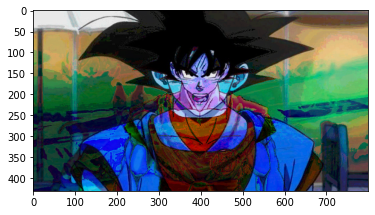

In [17]:
plt.imshow(imgand(img1,img2))

**OR**

In [18]:
def imgor(img1,img2):
  imgor = cv2.bitwise_or(img1, img2)
  imgor = cv2.cvtColor(imgor, cv2.COLOR_BGR2RGB)
  return imgor

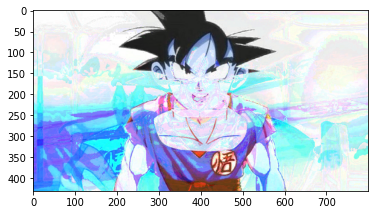

In [19]:
plt.imshow(imgor(img1,img2))

**XOR**

In [20]:
def imgxor(img1,img2):
  imgxor = cv2.bitwise_xor(img1, img2)
  imgxor = cv2.cvtColor(imgxor, cv2.COLOR_BGR2RGB)
  return imgxor

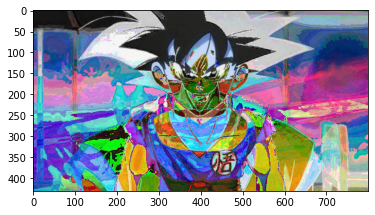

In [21]:
plt.imshow(imgxor(img1,img2))

**Problema 3**

In [22]:
# conversión colr to gray
def imgcolor2gray(imge):
  img = cv2.imread(imge)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ##plt.imshow(img, cmap='gray')
  return img

In [23]:
imgen = imgcolor2gray("goku.jpg")

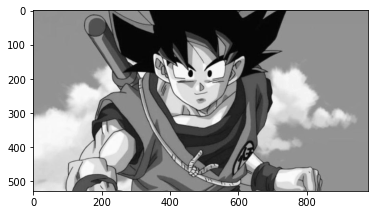

In [24]:
plt.imshow(imgen, cmap='gray')

In [25]:
def t3Dgray(img):
  x, y = np.mgrid[0:img.shape[0], 0:img.shape[1]]
  figura = plt.figure()
  ima3D = figura.gca(projection='3d')
  ima3D.plot_surface(x, y, img, cmap=plt.cm.gray)
  plt.show()

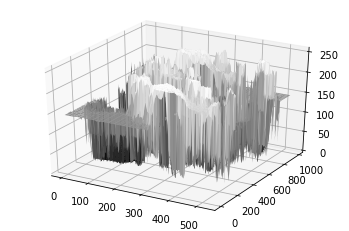

In [26]:
t3Dgray(imgen)

**Problema 4**

In [27]:
def transformacion(img, tipoTrans):

  
  alto = img.shape[0]
  ancho = img.shape[1]
  vtipoTran = tipoTrans.capitalize()

  
  out_img = np.zeros((alto, ancho), np.uint8)

  vecimgs = []
  titl = ['Original']

  vecimgs.append(img)
  titl.append(vtipoTran)

  for i in range(alto):
      for j in range(ancho):
          if vtipoTran == 'Negative':
            out_img[i][j] = 255 - img[i][j]
          elif vtipoTran == 'Linear':
            out_img[i][j] = 1.5 * img[i][j] + 10
          elif vtipoTran == 'Logarithmic':
            out_img[i][j] = 40 * np.log(1 + img[i][j])
          elif vtipoTran == 'Exponential': 
            out_img[i][j] = 2 * np.power(img[i][j], 0.9)

  vecimgs.append(out_img)

  
  plt.figure(figsize=(17,17))
  for i in range(len(vecimgs)):
    plt.subplot(1, len(vecimgs), i + 1)
    plt.imshow(vecimgs[i], cmap='gray')
    plt.title("{} Image".format(titl[i]), fontdict={"fontsize":12})
  plt.show()

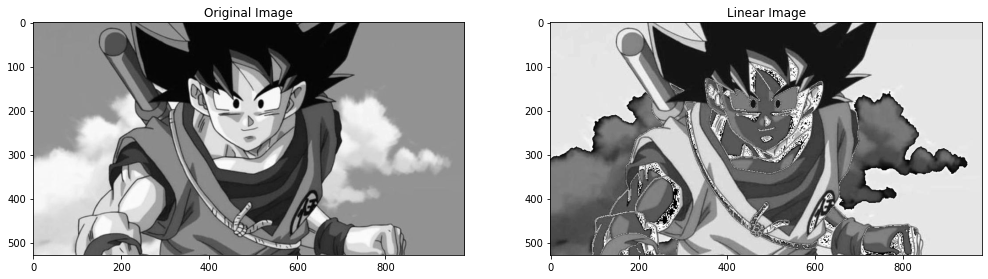

In [28]:
transformacion(imgen, 'linear')

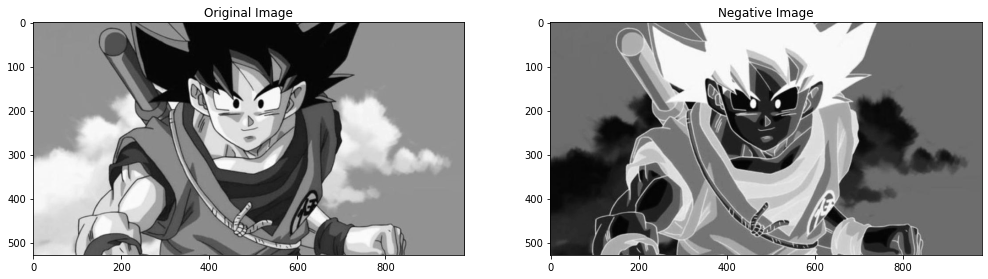

In [29]:
transformacion(imgen, 'negative')

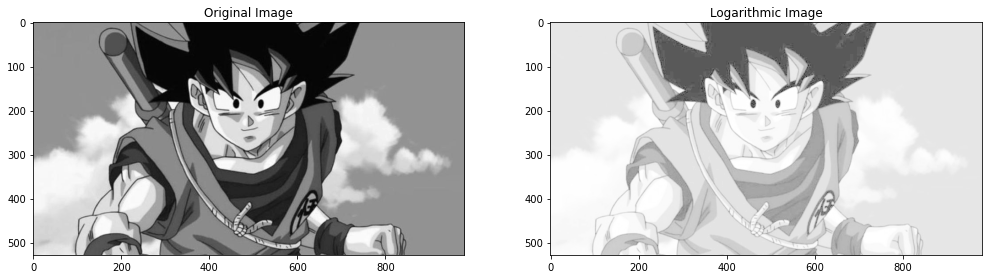

In [30]:
transformacion(imgen, 'logarithmic')

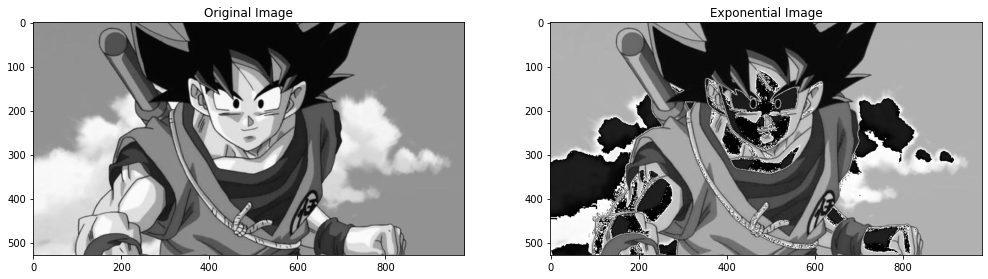

In [31]:
transformacion(imgen, 'exponential')

**Problema 5**

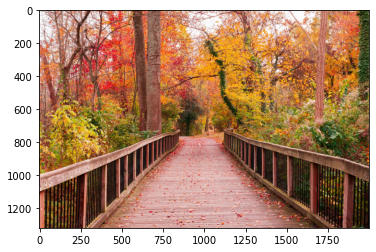

In [32]:
img3 =  cargaImagen("flores.jpg")

**Kernel**

In [33]:
small= np.ones((3, 3)) * (1.0 / (3 * 3))
large = np.ones((9, 9)) * (1.0 / (9 * 9))

gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                [2., 4., 2.],
                                [1., 2., 1.]])

sobel1 = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

sobel2 = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])

sharp = np.array([[0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]])

laplacian = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

**Funcion para aplicar filtro de convolución **

In [38]:
def convolucion(img, kernel):
  array = []
  titl = ['Original']

  array.append(img)
  titl.append('convolución ')

  img_conv = cv2.filter2D(img, -1, kernel)

  array.append(img_conv)

  
  plt.figure(figsize=(17,17))
  for i in range(len(array)):
    plt.subplot(1, len(array), i + 1)
    plt.imshow(array[i])
    plt.title("Imagen {} ".format(titl[i]), fontdict={"fontsize":14})
  plt.show()

**Large blur Kernel**

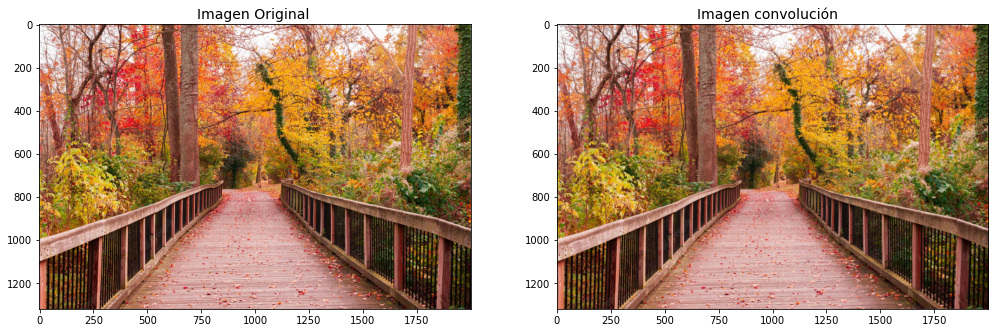

In [39]:
convolucion(img3, small)

**Large blur Kernel**

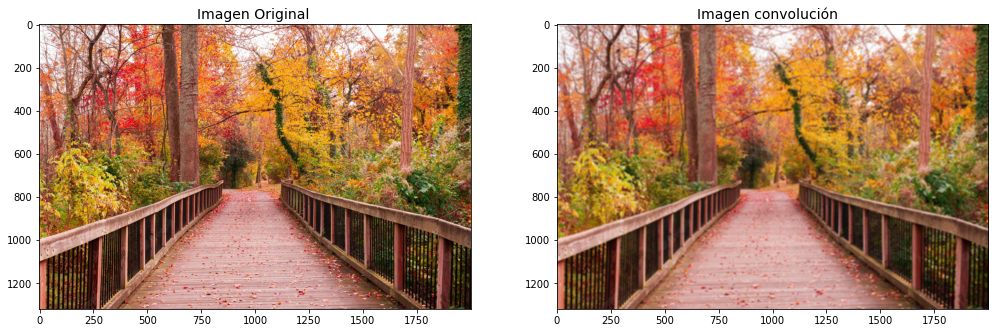

In [40]:
convolucion(img3, large)

**Gaussian Kernel**

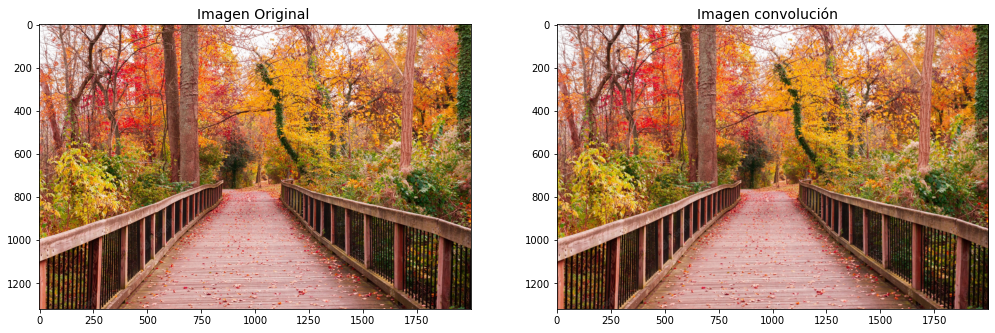

In [41]:
convolucion(img3, gaussian)

**Sobel Kernel en X**

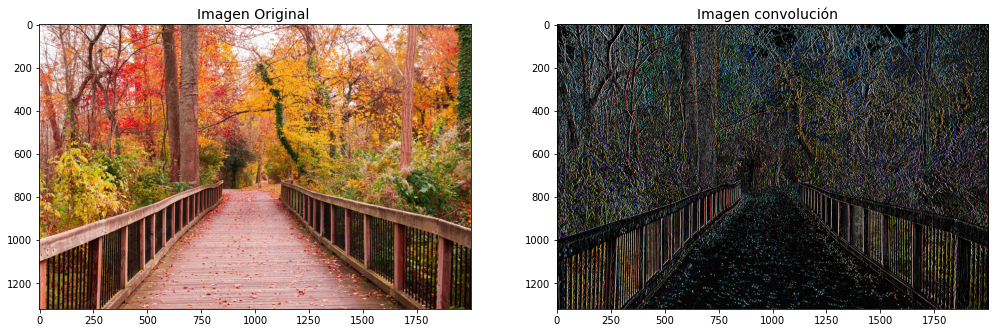

In [42]:
convolucion(img3, sobel1)

**Sobel Kernel en Y**

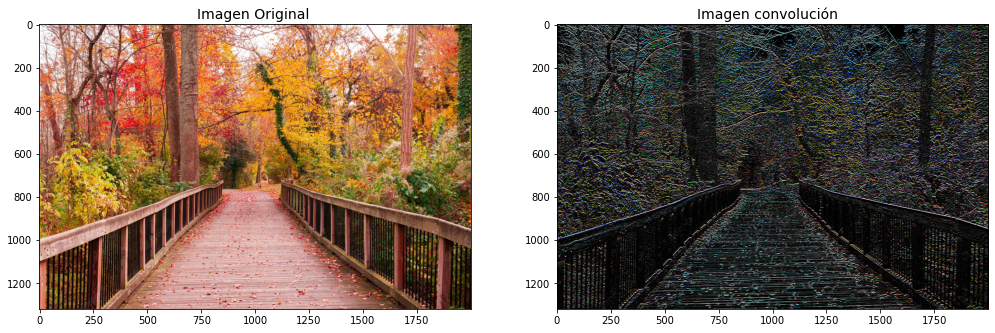

In [43]:
convolucion(img3, sobel2)

**Sharp Kernel**

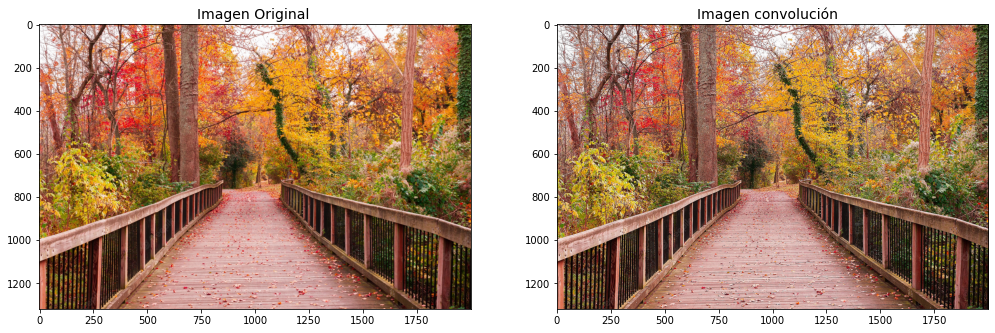

In [44]:
convolucion(img3, sharp)

**Laplacian Kernel**

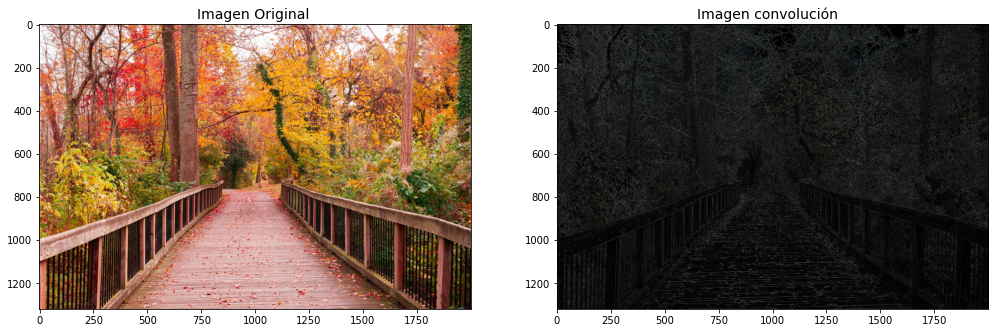

In [45]:
convolucion(img3, laplacian)

**Problema 6**

**Kernel laplaceano**
Utilizado en el procesamiento de imgenes, para la detección de bordes y estimación de movimientos. Se defien como la sua de las expresiones de coordenadas del operador  de laplace de segundas derivadas.

   

**Algoritmo de Canny:**  

Utilizada para detección de una amplia gama de bordes en imágenes.
Desarrollado por John F. Canny en 1986.
 
Este debe cumplir los siguientes puntos:


1.   Buena detección
2.   Buena localización
3.   Respuesta minima


